<a href="https://colab.research.google.com/github/alex-kondr/Data_Science_HW_2/blob/main/HW_2_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Прочитайте csv файл (використовуйте функцію read_csv)

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('bestsellers.csv')

Виведіть перші п'ять рядків (використовується функція head)

In [4]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


Виведіть розміри датасету (використовуйте атрибут shape)

In [5]:
df.shape

(550, 7)

Про скільки книг зберігає дані датасет? **Відповідь**: 550

In [7]:
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

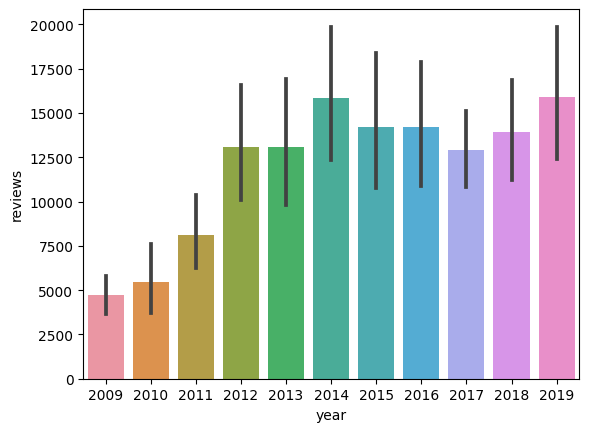

In [110]:
sns.barplot(data=df, x='year', y='reviews')
plt.show()

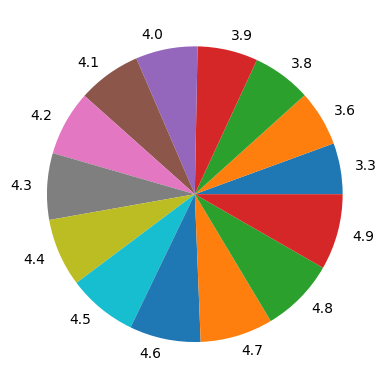

In [128]:
# df.groupby('user_rating').agg('count').index
plt.pie(df.groupby('user_rating').agg('count').index, labels=df.groupby('user_rating').agg('count').index)
plt.show()

Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum)

In [8]:
df.isnull().sum()

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

Чи є в якихось змінних пропуски? (Так / ні) **Відповідь**: Ні

Перевірте, які є унікальні значення в колонці genre (використовуйте функцію unique)

In [11]:
pd.unique(df['genre'])

array(['Non Fiction', 'Fiction'], dtype=object)

Які є унікальні жанри? **Відповідь**: 'Non Fiction', 'Fiction'

Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')

<Axes: ylabel='Frequency'>

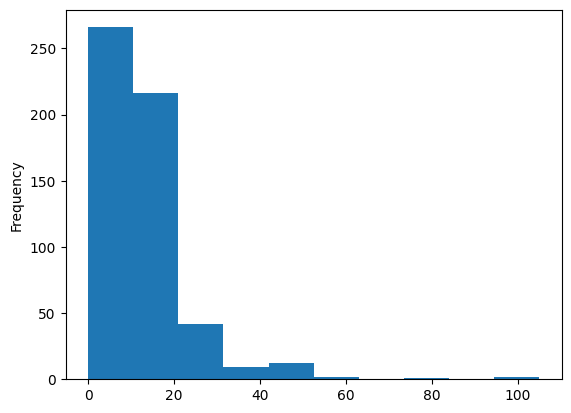

In [12]:
df['price'].plot(kind='hist')

Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції max, min, mean, median)

In [13]:
df['price'].min()

0

Мінімальна ціна? **Відповідь**: 0

In [14]:
df['price'].max()

105

Максимальна ціна? **Відповідь**: 105

In [15]:
df['price'].mean()

13.1

Середня ціна? **Відповідь**: 13.1

In [16]:
df['price'].median()

11.0

Медіанна ціна? **Відповідь**: 11

In [17]:
df['user_rating'].max()

4.9

Який рейтинг у датасеті найвищий? **Відповідь**: 4.9

In [8]:
df[df['user_rating'] == 4.9].shape

(52, 7)

Скільки книг мають такий рейтинг? **Відповідь**: 52

In [18]:
df[df['reviews'] == df['reviews'].max()]

,name,author,user_rating,reviews,price,year,genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction


Яка книга має найбільше відгуків? **Відповідь**: Where the Crawdads Sing

In [26]:
top_50_2015 = df[df['year'] == 2015]
# top_50['price'].mean()
top_50_2015[top_50_2015['price'] == top_50_2015['price'].max()]

,name,author,user_rating,reviews,price,year,genre
277,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2015,Non Fiction


З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)? **Відповідь**: Publication Manual of the American Psychologic...	

In [35]:
df[(df['year'] == 2010) & (df['genre'] == 'Fiction')].count()

name           20
author         20
user_rating    20
reviews        20
price          20
year           20
genre          20
dtype: int64

Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)? **Відповідь**: 20

In [42]:
df[(df['user_rating'] == 4.9) & df['year'].isin([2010, 2011])]

,name,author,user_rating,reviews,price,year,genre
187,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,4.9,19576,8,2011,Non Fiction


Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)? **Відповідь**: 1


І насамкінець, давайте відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів (використовуйте функцію sort_values).

In [43]:
top_50_2015_sort = df[(df['year'] == 2015) & (df['price'] < 8)].sort_values('price')
top_50_2015_sort

,name,author,user_rating,reviews,price,year,genre
507,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2015,Fiction
210,Laugh-Out-Loud Jokes for Kids,Rob Elliott,4.6,6990,4,2015,Non Fiction
206,Knock-Knock Jokes for Kids,Rob Elliott,4.5,3673,4,2015,Non Fiction
111,First 100 Words,Roger Priddy,4.7,17323,4,2015,Non Fiction
123,Giraffes Can't Dance,Giles Andreae,4.8,14038,4,2015,Fiction
54,Creative Haven Creative Cats Coloring Book (Ad...,Marjorie Sarnat,4.8,4022,4,2015,Non Fiction
63,Dear Zoo: A Lift-the-Flap Book,Rod Campbell,4.8,10922,5,2015,Fiction
89,Dover Creative Haven Art Nouveau Animal Design...,Marty Noble,4.6,2134,5,2015,Non Fiction
478,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2015,Fiction
201,Killing Reagan: The Violent Assault That Chang...,Bill O'Reilly,4.6,5235,5,2015,Non Fiction


Яка книга остання у відсортованому списку? **Відповідь**: Old School (Diary of a Wimpy Kid #10)	

Для початку давайте подивимося на максимальну та мінімальну ціни для кожного з жанрів (використовуйте функції groupby та agg, для підрахунку мінімальних та максимальних значень використовуйте max та min). Не беріть усі стовпці, виберіть тільки потрібні вам

In [50]:
df.groupby('genre')['price'].agg('max')

genre
Fiction         82
Non Fiction    105
Name: price, dtype: int64

In [49]:
df[df['genre'] == 'Fiction'].max()

name           Wrecking Ball (Diary of a Wimpy Kid Book 14)
author                                     Wizards RPG Team
user_rating                                             4.9
reviews                                               87841
price                                                    82
year                                                   2019
genre                                               Fiction
dtype: object

Максимальна ціна для жанру Fiction: **Відповідь**: 82

In [51]:
df.groupby('genre')['price'].agg('min')

genre
Fiction        0
Non Fiction    0
Name: price, dtype: int64

In [52]:
df[df['genre'] == 'Fiction'].min()

name           11/22/63: A Novel
author          Abraham Verghese
user_rating                  3.3
reviews                      548
price                          0
year                        2009
genre                    Fiction
dtype: object

Мінімальна ціна для жанру Fiction: **Відповідь**: 0

Максимальна ціна для жанру Non Fiction: **Відповідь**: 105

Мінімальна ціна для жанру Non Fiction: **Відповідь**: 0

Тепер створіть новий датафрейм, який вміщатиме кількість книг для кожного з авторів (використовуйте функції groupby та agg, для підрахунку кількості використовуйте count). Не беріть усі стовпці, виберете тільки потрібні

In [100]:
group_author = df.groupby('author').agg('count').name
group_author

author
Abraham Verghese              2
Adam Gasiewski                1
Adam Mansbach                 1
Adir Levy                     1
Admiral William H. McRaven    1
                             ..
Walter Isaacson               3
William Davis                 2
William P. Young              2
Wizards RPG Team              3
Zhi Gang Sha                  2
Name: name, Length: 248, dtype: int64

Якої розмірності вийшла таблиця? **Відповідь**: 248

In [99]:
group_author[group_author == group_author.max()]

author
Jeff Kinney    12
Name: name, dtype: int64

Який автор має найбільше книг? **Відповідь**: Jeff Kinney

Скільки книг цього автора? **Відповідь**: 12

Тепер створіть другий датафрейм, який буде вміщати середній рейтинг для кожного автора (використовуйте функції groupby та agg, для підрахунку середнього значення використовуйте mean). Не беріть усі стовпці, виберете тільки потрібні

In [101]:
author_rating_mean = df.groupby('author').agg({'user_rating': 'mean'})
author_rating_mean

,user_rating
author,
Abraham Verghese,4.600000
Adam Gasiewski,4.400000
Adam Mansbach,4.800000
Adir Levy,4.800000
Admiral William H. McRaven,4.700000
...,...
Walter Isaacson,4.566667
William Davis,4.400000
William P. Young,4.600000


In [103]:
author_rating_mean[author_rating_mean['user_rating'] == author_rating_mean['user_rating'].min()]

,user_rating
author,
Donna Tartt,3.9


У якого автора середній рейтинг мінімальний? **Відповідь**: Donna Tartt

Який у цього автора середній рейтинг? **Відповідь**: 3.9

З'єднайте останні два датафрейми так, щоб для кожного автора було видно кількість книг та середній рейтинг (Використовуйте функцію concat з параметром axis=1). Збережіть результат у змінну

In [105]:
author_count_mean_rating = pd.concat([group_author, author_rating_mean], axis=1)
author_count_mean_rating

,name,user_rating
author,,
Abraham Verghese,2,4.600000
Adam Gasiewski,1,4.400000
Adam Mansbach,1,4.800000
Adir Levy,1,4.800000
Admiral William H. McRaven,1,4.700000
...,...,...
Walter Isaacson,3,4.566667
William Davis,2,4.400000
William P. Young,2,4.600000


Відсортуйте датафрейм за зростаючою кількістю книг та зростаючим рейтингом (використовуйте функцію sort_values)

In [106]:
author_count_mean_rating.sort_values(['name', 'user_rating'])

,name,user_rating
author,,
Muriel Barbery,1,4.000000
Chris Cleave,1,4.100000
Ian K. Smith M.D.,1,4.100000
Pierre Dukan,1,4.100000
Elizabeth Strout,1,4.200000
...,...,...
American Psychological Association,10,4.500000
Suzanne Collins,11,4.663636
Gary Chapman,11,4.736364


Який автор перший у списку? **Відповідь**: Muriel Barbery	